This is a test of using the MTCNN face detector to feed face inputs to our vision pipeline. This link to the Kaggle site demonstrating how to use the tool is found [here](https://www.kaggle.com/code/timesler/guide-to-mtcnn-in-facenet-pytorch).

In [5]:
from facenet_pytorch import MTCNN
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

torch.Size([3, 160, 160])

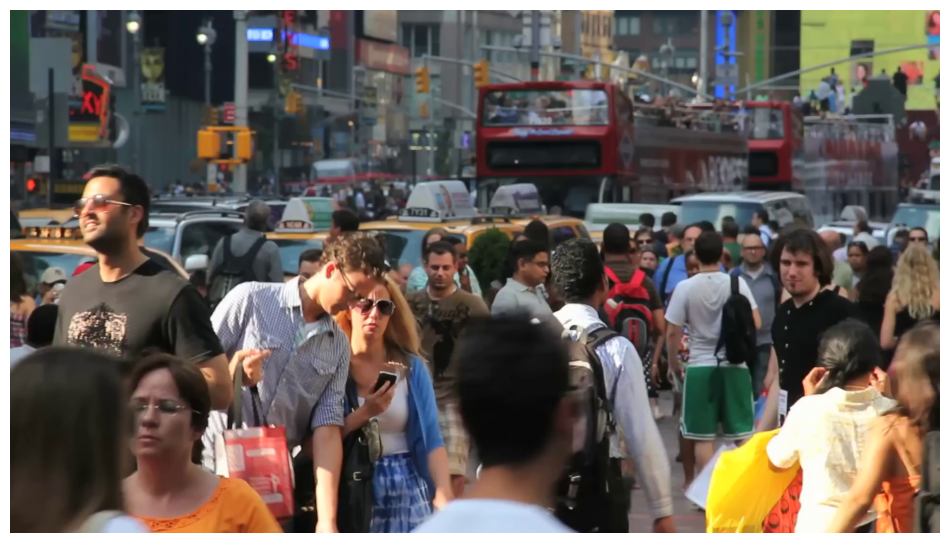

In [6]:
# Create face detector
mtcnn = MTCNN(select_largest=False, device='cuda:0')

# Load a single image and display
v_cap = cv2.VideoCapture('../videoplayback.mp4')
success, frame = v_cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame = Image.fromarray(frame)

plt.figure(figsize=(12, 8))
plt.imshow(frame)
plt.axis('off')

# Detect face
face = mtcnn(frame)
face.shape

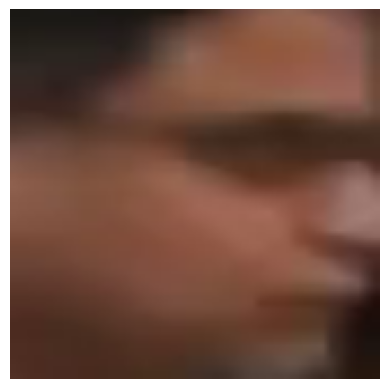

In [7]:
# Create face detector
mtcnn = MTCNN(select_largest=False, post_process=False, device='cuda:0')

# Detect face
face = mtcnn(frame)

# Visualize
plt.imshow(face.permute(1, 2, 0).int().numpy())
plt.axis('off')

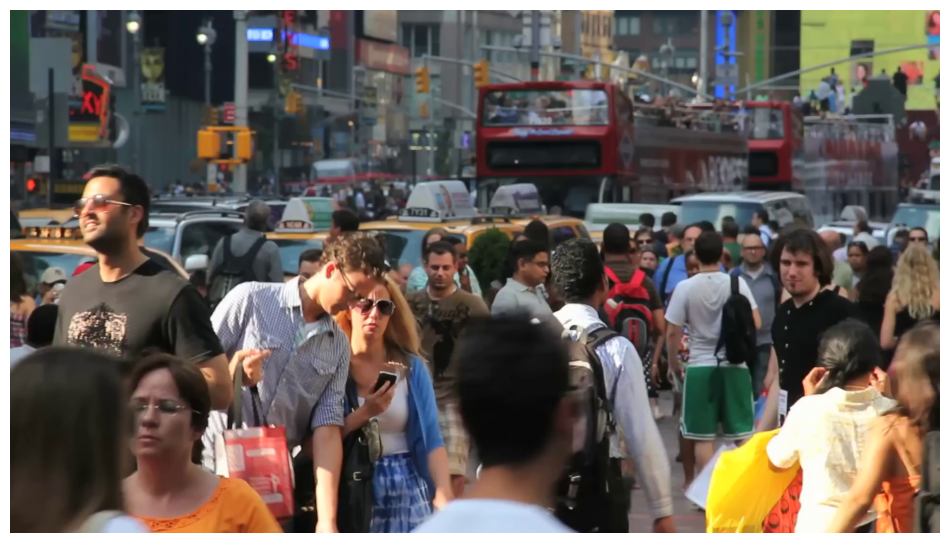

/tmp/ipykernel_27795/3353470518.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


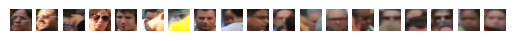

In [9]:
# Create face detector
mtcnn = MTCNN(margin=20, keep_all=True, post_process=False, device='cuda:0')

# Load a single image and display
v_cap = cv2.VideoCapture('../videoplayback.mp4')
success, frame = v_cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame = Image.fromarray(frame)

plt.figure(figsize=(12, 8))
plt.imshow(frame)
plt.axis('off')
plt.show()

# Detect face
faces = mtcnn(frame)

# Visualize
fig, axes = plt.subplots(1, len(faces))
for face, ax in zip(faces, axes):
    ax.imshow(face.permute(1, 2, 0).int().numpy())
    ax.axis('off')
fig.show()